# <b>Bioinf575 final project: Lung cancer subtyping<b>
### <b>Team 7<b>
Paula Magdalena Fraczek     
Jiayu Liu       
Sophia Angelina Marcotte       
Xiheng Ren

## Answer to Questions:
### Paula
**Question 1:** <br />
> One of the challenges of working on this project was familiarizing myself with the structure of the raw data and being able to manipulate it in order to run the model fitting and predictions with the k-means clustering algorithm. <br />

**Question 2:** <br />
> I learned more about working with dataframes and arrays, and I also got to learn a how to use a new module (sklearn.cluster) for k-means clustering of high-dimensional data. <br />

**Question 3:** <br />
> With more time on this project, I would've liked to address which genes are most differentially expressed between the clusters and are responsible for the most variance between samples.

### Jiayu:
**Question 1:** <br />
> The greatest challenge was using creating a model to test the data, since it requires a review of other's code in the project as well, and writting the code it self invovled a lot of error corrections. In addition, it was diffcult to work together as a team on this project using the Notebook.

**Question 2:** <br />
> Through the project, I've learned how building a function is able to 
> train and be applied to the given biological data. I've learned to read and test 
> other's codes and follow thorugh to enable me to build this model. 

**Question 3:** <br />
> I would like to see if / how a real prognosis can align with this model, but also incorating
> more samples into the data to increase accuracy of the model.
 
### Sophia:
**Question 1:** <br />
>One of the challenges I had during this project was figuring out what the positive and negative     implications of this data were when calculating accuracy. Applying this equation to our project took some time to understand. From this, also how to navigate and subset the df with code. <br />

**Question 2:** <br />
>While working on this project although challenging, I feel like I got better at working with data frames. This is something that has been challenging to me in python, but this project gave me a better understanding of that (accessing items, subsetting, etc.) <br />

**Question 3:** <br />
>Would the accuracy of predictions improve if a different model was used? Try using a different ML method.

### Xiheng:
**Question 1:** <br />
>The most challenging part for me is reading the soft file data. GEOparse is a new package for me and I need to read the documentation to know how to retrieve the data I want. It took a while for me to figure out how to deal with that, but I got it through finally.

**Question 2:** <br />
>I think the first thing is learning to understand and utilize new packages in Python like GEOparse and sklearn. Second, we learned how to perform clustering and analysis the result.

**Question 3:** <br />
>If I have more time for this project, I want to not restrict the cluster number to 2 because there are more than 2 subtypes of lung cancer. If I can have the data containing more than 2 subtypes of lung cancer, I'm willing to perform clusterings with more than 2 clusters and see how these things will affect the accuracy.

###  1 - Load the data - you can use the GEOparse module for this task.

https://geoparse.readthedocs.io/en/latest/introduction.html

Install GEOparse:

`
pip install GEOparse
`

In [45]:
#pip install GEOparse

In [1]:
import pandas as pd
import numpy as np
import GEOparse

In [2]:
# load the data
gse = GEOparse.get_GEO(filepath="./GSE10245_family.soft.gz")

07-Dec-2022 01:15:43 INFO GEOparse - Parsing ./GSE10245_family.soft.gz: 
07-Dec-2022 01:15:43 DEBUG GEOparse - DATABASE: GeoMiame
07-Dec-2022 01:15:43 DEBUG GEOparse - SERIES: GSE10245
07-Dec-2022 01:15:43 DEBUG GEOparse - PLATFORM: GPL570
c:\Users\rxh\AppData\Local\Programs\Python\Python310\lib\site-packages\GEOparse\GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
07-Dec-2022 01:15:45 DEBUG GEOparse - SAMPLE: GSM258551
07-Dec-2022 01:15:46 DEBUG GEOparse - SAMPLE: GSM258552
07-Dec-2022 01:15:46 DEBUG GEOparse - SAMPLE: GSM258553
07-Dec-2022 01:15:46 DEBUG GEOparse - SAMPLE: GSM258554
07-Dec-2022 01:15:46 DEBUG GEOparse - SAMPLE: GSM258555
07-Dec-2022 01:15:46 DEBUG GEOparse - SAMPLE: GSM258556
07-Dec-2022 01:15:46 DEBUG GEOparse - SAMPLE: GSM258557
07-Dec-2022 01:15:46 DEBUG GEOparse - SAMPLE: GSM258558
07-Dec-2022 01:15:47 DEBUG GEOparse - SAMPLE: GSM258559

In [3]:
# store all the values in a list and covert it into a np.array for further steps
GSE10245_list = []
for gsm in gse.gsms.values():
    GSE10245_list.append(np.array(gsm.table.VALUE))
GSE10245_array = np.array(GSE10245_list)

In [4]:
GSE10245_array

array([[ 9.12990455,  8.03402159,  3.56451954, ..., 13.03172566,
        15.02872852, 14.58634692],
       [ 9.84334874,  7.97333202,  4.99485242, ..., 12.25003257,
        14.44075556, 14.0723661 ],
       [ 9.7306612 ,  8.8340448 ,  5.06601813, ..., 11.79836318,
        14.43988695, 14.0113917 ],
       ...,
       [ 9.1990796 ,  8.22095931,  6.00653368, ..., 12.22727554,
        14.41318789, 14.08389923],
       [ 7.63576509,  7.4321354 ,  5.48447032, ..., 12.61688381,
        14.70522623, 14.36960707],
       [ 8.76008197,  7.59643144,  5.37258266, ..., 12.77616446,
        14.71989361, 14.37189913]])

### 2 - Perform clustering - you can use the sklearn.cluster module for this task.

https://scikit-learn.org/stable/modules/clustering.html#k-meansLinks 

https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_clustering_algorithms_k_means.htm

Install sklearn:

`
pip install -U scikit-learn
`

In [50]:
#pip install -U scikit-learn

In [5]:
from sklearn.cluster import KMeans

In [6]:
# define a function for clustering
def train(Data,n=2):
    '''
    use Kmeans to cluster data

    Parameters:
        Data: The data wanted to be clustered in a form as numpy.array.
        n: number of clusters you want.

    Return:
        A KMeans object. 
    '''
    # create a cluster object
    cluster = KMeans(n_clusters=n)
    # do the k-mean on the data
    cluster.fit(Data)
    return cluster 

In [7]:
cluster = train(Data=GSE10245_array,n=2)

In [8]:
# retreive the cluster number
cluster_number = cluster.labels_

### 3 - Once clusters have been identified, create a DataFrame that contains the 58 sample labels as one column, the cluster number as another column and the subtype given in the dataset (adenocarcinoma or squamous cell carcinoma) as another column.

The information about the subtype for a sample is available in the sample metadata as characteristic.

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM258551Links

It can be retrieved programmatically from the objects created using GEOparse functions.

In [9]:
# retrieve the sample labels from the data
sample_labels_list = list(gse.gsms.keys())
cluster_num_list = list(cluster_number)
# retrieve the subtype from the data
subtype_list = []
for gsm in gse.gsms.values():
    subtype_list.append(gsm.metadata["characteristics_ch1"][0].split(":")[1].strip())

In [10]:
# combine the 3 lists to a dataframe
sample_cluster_df = pd.DataFrame({"Sample_labels": sample_labels_list, "Cluster_number": cluster_num_list, "Actual_subtype" : subtype_list})

In [11]:
sample_cluster_df

,Sample_labels,Cluster_number,Actual_subtype
0,GSM258551,0,adenocarcinoma
1,GSM258552,0,adenocarcinoma
2,GSM258553,1,squamous cell carcinoma
3,GSM258554,0,adenocarcinoma
4,GSM258555,1,squamous cell carcinoma
5,GSM258556,0,squamous cell carcinoma
6,GSM258557,1,squamous cell carcinoma
7,GSM258558,0,adenocarcinoma
8,GSM258559,0,adenocarcinoma
9,GSM258560,0,adenocarcinoma


### 4 - Compute and display the accuracy of this clustering. 

<img src = https://wikimedia.org/api/rest_v1/media/math/render/svg/7588abeafe63ab4b8ae63f954978186276e54d01 width = 400/>

https://en.wikipedia.org/wiki/Precision_and_recall

The data contains 40 adenocarcinoma (AD) samples and 18 squamous cell carcinoma (SCC) samples

In [12]:
def cal_accuracy(sample_cluster_df):
    '''
    Calculate the accuracy of KMeans clustering:
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    Parameters:
        sample_cluster_df: a Panda.DataFrame which contains at least two colums named "Cluster_number" and "Actual_subtype".
            "Cluster_number" should contain the clustering result from KMeans method.
            "Actual_subtype" should contain the the actual lung cancer subtype of the sample.

    Return:
        The accuracy of KMeans clustering in a numerical form.
    '''
    # calculate the true positive rate
    tpc1 = sample_cluster_df.Cluster_number == 1
    tpc2 = sample_cluster_df.Actual_subtype == 'squamous cell carcinoma'
    tp = len(sample_cluster_df.loc[tpc1 & tpc2])
    # calculate the true negative rate
    tnc1 = sample_cluster_df.Cluster_number == 0
    tnc2 = sample_cluster_df.Actual_subtype == 'adenocarcinoma'
    tn = len(sample_cluster_df.loc[tnc1 & tnc2])
    # calculate the false positive rate
    fpc1 = sample_cluster_df.Cluster_number == 1
    fpc2 = sample_cluster_df.Actual_subtype == 'adenocarcinoma'
    fp = len(sample_cluster_df.loc[fpc1 & fpc2])
    # calculate the false negative rate
    fnc1 = sample_cluster_df.Cluster_number == 0
    fnc2 = sample_cluster_df.Actual_subtype == 'squamous cell carcinoma'
    fn = len(sample_cluster_df.loc[fnc1 & fnc2])
    # put the equation together and solve
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    if (accuracy<0.5):
        accuracy = 1-accuracy
    return accuracy

In [13]:
accuracy = cal_accuracy(sample_cluster_df)
print("Accuracy on all data is: " + str(accuracy))

Accuracy on all data is: 0.9310344827586207


### 5 - Fit the model on half of the data (balanced: 20 AD and 9 SCC) and assign a label to the clusters (AD or SCC), then use the model to predict the cluster/label for the other half of the data.

In [14]:
#create a function to create dataframe and assign labels
def build_Data_frame(cluster_number, sample_lables_lst, subtype_list):
    ## create the data frame every time we train the new data 
    cluster_num_list = list(cluster_number) 
    
    #assign label based on cluster numbers (the larger cluster is AD, the smaller cluster is SCC)
    #condition to check which cluster is larger to assign correct number to AD and SCC
    if cluster_num_list.count(0) > cluster_num_list.count(1):
        AD_cluster = 0
        SCC_cluster = 1
    else:
        AD_cluster = 1
        SCC_cluster = 0
        
    assigned_subtype = []
    for i in cluster_number:
        if i == AD_cluster:
            assigned_subtype.append('adenocarcinoma')
        if i == SCC_cluster:
            assigned_subtype.append('squamous cell carcinoma')
        
    #compile into dataframe
    final_df = pd.DataFrame({"Sample_labels": sample_lables_lst, "Cluster_number": cluster_num_list, "Model-assigned subtype" : assigned_subtype, "Actual_subtype":subtype_list})
        
    return final_df

In [15]:
#find indices that correspond to adenocarcinoma and squamous cell carcinoma
AD_ind = [i for i in range(len(subtype_list)) if subtype_list[i] == 'adenocarcinoma']
SCC_ind = [i for i in range(len(subtype_list)) if subtype_list[i] == 'squamous cell carcinoma']


In [16]:
#select half of the indices from each list to identify samples for fitting model, and other half for predictions
AD_fit = AD_ind[0:int(len(AD_ind)/2)] #first half for fitting
AD_predict = AD_ind[int(len(AD_ind)/2):int(len(AD_ind))+1] #second half for predicting

SCC_fit = SCC_ind[0:int(len(SCC_ind)/2)] #first half for fitting
SCC_predict = SCC_ind[int(len(SCC_ind)/2):int(len(AD_ind))+1] #second half for predicting

#concatenate lists
fit_data_ind = AD_fit + SCC_fit
predict_data_ind = AD_predict + SCC_predict


In [17]:
# split GSE data in half for fitting model using indices found above
fit_data = GSE10245_array[fit_data_ind]
predict_data = GSE10245_array[predict_data_ind]

In [18]:
# first, perform model fitting on first half of the data

# use the train function
fit_cluster = train(Data=fit_data,n=2)

In [19]:
# retreive the cluster numbers
fit_cluster_number = fit_cluster.labels_
fit_cluster_num_list = list(fit_cluster_number)


In [20]:
# also retrieve actual subtypes and sample names for comparisons
sample_labels = []
actual_subtypes = []
for i in fit_data_ind:
    actual_subtypes.append(subtype_list[i])
    sample_labels.append(sample_labels_list[i])

In [21]:
#use function to create a dataframe and assign labels
fit_model_df = build_Data_frame(cluster_number=fit_cluster_number, sample_lables_lst=sample_labels, subtype_list=actual_subtypes)
fit_model_df

,Sample_labels,Cluster_number,Model-assigned subtype,Actual_subtype
0,GSM258551,1,adenocarcinoma,adenocarcinoma
1,GSM258552,1,adenocarcinoma,adenocarcinoma
2,GSM258554,1,adenocarcinoma,adenocarcinoma
3,GSM258558,1,adenocarcinoma,adenocarcinoma
4,GSM258559,1,adenocarcinoma,adenocarcinoma
5,GSM258560,1,adenocarcinoma,adenocarcinoma
6,GSM258561,1,adenocarcinoma,adenocarcinoma
7,GSM258564,1,adenocarcinoma,adenocarcinoma
8,GSM258567,1,adenocarcinoma,adenocarcinoma
9,GSM258568,1,adenocarcinoma,adenocarcinoma


In [22]:
# use model to predict subtypes on remaining half of data
predictions = list(fit_cluster.predict(predict_data))

# also retrieve actual subtypes and sample names for comparisons
sample_labels = []
actual_subtypes = []
for i in predict_data_ind:
    actual_subtypes.append(subtype_list[i])
    sample_labels.append(sample_labels_list[i])
    
#use function to create a dataframe and assign labels
predict_model_df = build_Data_frame(cluster_number=predictions, sample_lables_lst=sample_labels, subtype_list=actual_subtypes)
predict_model_df

,Sample_labels,Cluster_number,Model-assigned subtype,Actual_subtype
0,GSM258582,1,adenocarcinoma,adenocarcinoma
1,GSM258584,1,adenocarcinoma,adenocarcinoma
2,GSM258586,1,adenocarcinoma,adenocarcinoma
3,GSM258587,1,adenocarcinoma,adenocarcinoma
4,GSM258588,1,adenocarcinoma,adenocarcinoma
5,GSM258589,1,adenocarcinoma,adenocarcinoma
6,GSM258591,1,adenocarcinoma,adenocarcinoma
7,GSM258592,1,adenocarcinoma,adenocarcinoma
8,GSM258593,1,adenocarcinoma,adenocarcinoma
9,GSM258595,1,adenocarcinoma,adenocarcinoma


### 6 - Compute and display the accuracy of the model for the prediction results (testing data).

In [23]:
#use the function created in step 4: cal_accuracy()
predict_accuracy = cal_accuracy(predict_model_df)
print("Accuracy of predciction on training data (half of all data) is: " + str(predict_accuracy))

Accuracy of predciction on training data (half of all data) is: 0.9310344827586207


### 7 -  Plot (bar plot) the 3 accuracy values for the model:

(i) train the model on all the data and compute the accuracy of the model on that data

(ii) train the model on half of the data and compute the accuracy of the model on that data

(iii) compute the model accuracy built at point (ii) on the other half of the data (test data)

In [24]:
# for (i) train the model on all the data and compute the accuracy of the model on that data, the result is stored in "sample_cluster_df"
first_accuracy = cal_accuracy(sample_cluster_df)

In [25]:
# for (ii) train the model on half of the data and compute the accuracy of the model on that data, the result is stored in "fit_model_df"
second_accuracy = cal_accuracy(fit_model_df)

In [26]:
# for (iii) compute the model accuracy built at point (ii) on the other half of the data (test data), the result is stored in "predict_model_df"
third_accuracy = cal_accuracy(predict_model_df)

In [27]:
accuracy = ["all", "training half" ,"testing half" ]
accuracy_data= [first_accuracy, second_accuracy, third_accuracy] 

In [28]:
import matplotlib.pyplot as plot

Text(0, 0.5, 'Accuracy')

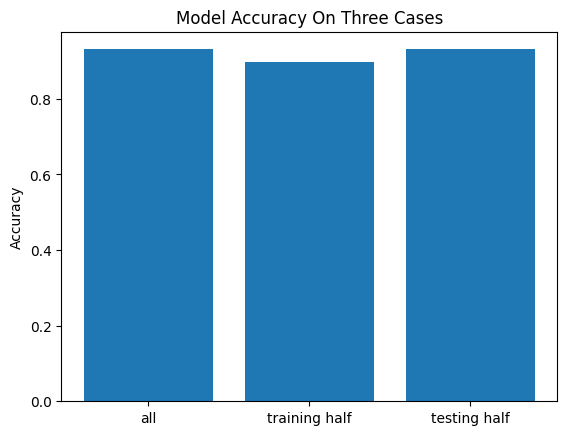

In [29]:
plot.bar(accuracy, accuracy_data)
plot.title("Model Accuracy On Three Cases")
plot.ylabel("Accuracy")
## adpated from https://datatofish.com/bar-chart-python-matplotlib/